In [23]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [24]:
bankloanDF=pd.read_csv('bankloan.csv')

In [25]:
bankloanDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dealing with NaN values

In [26]:
bankloanDF.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
bankloanDF.isna().any() #dafault axis=0

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [28]:
bankloanDF.isna().any(axis=1)

0       True
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [29]:
bankloanDF.isna().all() #default axis=0

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [30]:
bankloanDF.isna().all(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

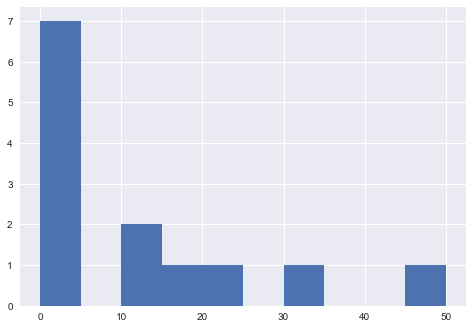

In [31]:
#default axis=0
plt.hist(bankloanDF.isna().sum())
plt.show()

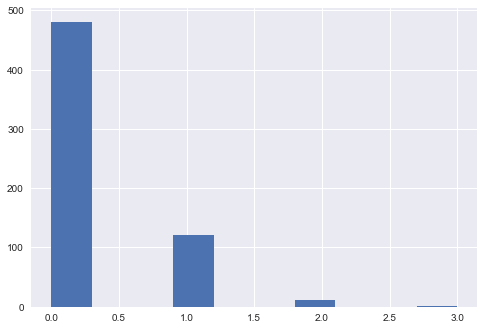

In [32]:
plt.hist(bankloanDF.isna().sum(axis=1))
plt.show()

In [33]:
bankloanDF.columns[bankloanDF.isna().any()] #default axis=0

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [34]:
bankloanDF.index[bankloanDF.isna().any(axis=1)]

Int64Index([  0,  11,  16,  19,  23,  24,  29,  30,  35,  36,
            ...
            571, 576, 579, 583, 588, 592, 597, 600, 601, 605],
           dtype='int64', length=134)

In [35]:
bankloanDF.dropna(axis=0,how='any',inplace=True)

In [36]:
bankloanDF.columns[bankloanDF.isna().any()] #default axis=0

Index([], dtype='object')

In [37]:
bankloanDF.index[bankloanDF.isna().any(axis=1)]

Int64Index([], dtype='int64')

# Plotting hists

In [38]:
bankloanDF.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2.0,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


based on gender

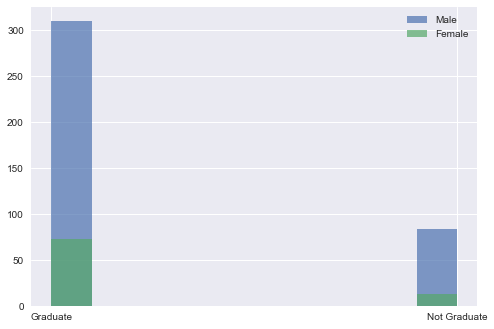

In [39]:
bankloanDF[bankloanDF.Gender=='Male']['Education'].hist(alpha=0.7)
bankloanDF[bankloanDF.Gender=='Female']['Education'].hist(alpha=0.7)
plt.legend(['Male','Female'])
plt.show()

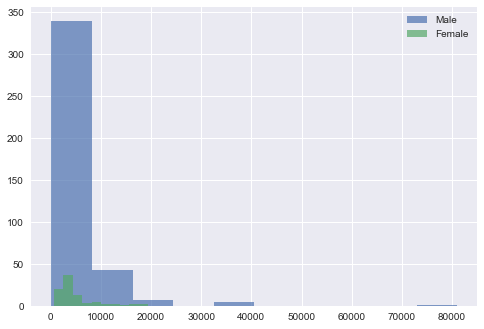

In [40]:
bankloanDF[bankloanDF.Gender=='Male']['ApplicantIncome'].hist(alpha=0.7)
bankloanDF[bankloanDF.Gender=='Female']['ApplicantIncome'].hist(alpha=0.7)
plt.legend(['Male','Female'])
plt.show()

based on education

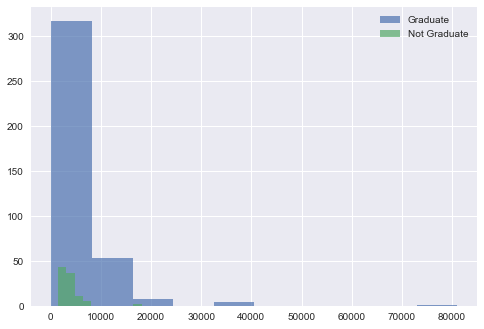

In [41]:
bankloanDF[bankloanDF.Education=='Graduate']['ApplicantIncome'].hist(alpha=0.7)
bankloanDF[bankloanDF.Education=='Not Graduate']['ApplicantIncome'].hist(alpha=0.7)
plt.legend(['Graduate','Not Graduate'])
plt.show()

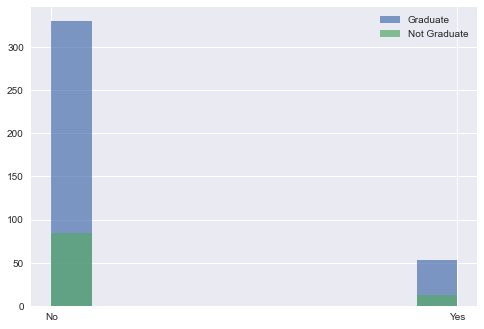

In [42]:
bankloanDF[bankloanDF.Education=='Graduate']['Self_Employed'].hist(alpha=0.7)
bankloanDF[bankloanDF.Education=='Not Graduate']['Self_Employed'].hist(alpha=0.7)
plt.legend(['Graduate','Not Graduate'])
plt.show()

In [47]:
def modeC(col):
    return stats.mode(col)[0][0]
def pec30(col):
    return col.quantile(0.3)
bankloanDF.groupby(['Gender','Self_Employed','Education'])['ApplicantIncome','CoapplicantIncome'].agg([np.mean,np.min,np.max,np.median,np.var,np.std,pec30,modeC])

C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


ApplicantIncome                        \
                                             mean  amin   amax   median   
Gender Self_Employed Education                                            
Female No            Graduate         4279.830769   645  14866   3510.0   
                     Not Graduate     3020.222222  1928   4606   2213.0   
       Yes           Graduate         9436.375000  2600  19484   8032.5   
                     Not Graduate    11609.250000  3867  18165  12202.5   
Male   No            Graduate         5631.954717   150  81000   3941.0   
                     Not Graduate     3508.013333  1442   7660   3273.0   
       Yes           Graduate         7811.400000  1000  39147   6250.0   
                     Not Graduate     4494.444444  1875   7100   4344.0   

                                                                            \
                                            var          std   pec30 modeC   
Gender Self_Employed Education                                               
Female No            Graduate      7.658005e+06  2767.310137  2932.6  5000   
                     Not Graduate  1.350733e+06  1162.210585  2155.4  1928   
       Yes           Graduate      3.365953e+07  5801.683227  5694.1  2600   
                     Not Graduate  5.161383e+07  7184.276924  6814.5  3867   
Male   No            Graduate      4.372290e+07  6612.329189  3160.4  2500   
                     Not Graduate  1.778656e+06  1333.662753  2648.2  2600   
       Yes           Graduate      4.154373e+07  6445.442189  4604.8  1000   
                     Not Graduate  3.476020e+06  1864.408761  3186.6  1875   

                                  CoapplicantIncome                        \
                                               mean amin     amax  median   
Gender Self_Employed Education                                              
Female No            Graduate            833.892308  0.0   8980.0     0.0   
                     Not Graduate        542.333333  0.0   3237.0     0.0   
       Yes           Graduate            214.625000  0.0   1717.0     0.0   
                     Not Graduate          0.000000  0.0      0.0     0.0   
Male   No            Graduate           1874.935547  0.0  33837.0  1522.0   
                     Not Graduate       1323.773333  0.0   7101.0  1430.0   
       Yes           Graduate           2007.333333  0.0  20000.0     0.0   
                     Not Graduate       1294.777778  0.0   3449.0  1000.0   

                                                                           
                                            var          std  pec30 modeC  
Gender Self_Employed Education                                             
Female No            Graduate      2.334622e+06  1527.946836    0.0   0.0  
                     Not Graduate  1.316722e+06  1147.485076    0.0   0.0  
       Yes           Graduate      3.685111e+05   607.051172    0.0   0.0  
                     Not Graduate  0.000000e+00     0.000000    0.0   0.0  
Male   No            Graduate      8.929790e+06  2988.275383    0.0   0.0  
                     Not Graduate  1.595670e+06  1263.198210    0.0   0.0  
       Yes           Graduate      1.190999e+07  3451.084777    0.0   0.0  
                     Not Graduate  1.555780e+06  1247.309182  294.4   0.0

In [48]:
def modeC(col):
    return stats.mode(col)[0][0]
def pec30(col):
    return col.quantile(0.3)

bankloanDF.groupby(['Gender','Self_Employed','Education'])['ApplicantIncome','CoapplicantIncome','LoanAmount'].agg([np.mean,np.min,np.max,np.median,np.var,np.std,pec30,modeC])

C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


ApplicantIncome                        \
                                             mean  amin   amax   median   
Gender Self_Employed Education                                            
Female No            Graduate         4279.830769   645  14866   3510.0   
                     Not Graduate     3020.222222  1928   4606   2213.0   
       Yes           Graduate         9436.375000  2600  19484   8032.5   
                     Not Graduate    11609.250000  3867  18165  12202.5   
Male   No            Graduate         5631.954717   150  81000   3941.0   
                     Not Graduate     3508.013333  1442   7660   3273.0   
       Yes           Graduate         7811.400000  1000  39147   6250.0   
                     Not Graduate     4494.444444  1875   7100   4344.0   

                                                                            \
                                            var          std   pec30 modeC   
Gender Self_Employed Education                                               
Female No            Graduate      7.658005e+06  2767.310137  2932.6  5000   
                     Not Graduate  1.350733e+06  1162.210585  2155.4  1928   
       Yes           Graduate      3.365953e+07  5801.683227  5694.1  2600   
                     Not Graduate  5.161383e+07  7184.276924  6814.5  3867   
Male   No            Graduate      4.372290e+07  6612.329189  3160.4  2500   
                     Not Graduate  1.778656e+06  1333.662753  2648.2  2600   
       Yes           Graduate      4.154373e+07  6445.442189  4604.8  1000   
                     Not Graduate  3.476020e+06  1864.408761  3186.6  1875   

                                  CoapplicantIncome       ...               \
                                               mean amin  ...  pec30 modeC   
Gender Self_Employed Education                            ...                
Female No            Graduate            833.892308  0.0  ...    0.0   0.0   
                     Not Graduate        542.333333  0.0  ...    0.0   0.0   
       Yes           Graduate            214.625000  0.0  ...    0.0   0.0   
                     Not Graduate          0.000000  0.0  ...    0.0   0.0   
Male   No            Graduate           1874.935547  0.0  ...    0.0   0.0   
                     Not Graduate       1323.773333  0.0  ...    0.0   0.0   
       Yes           Graduate           2007.333333  0.0  ...    0.0   0.0   
                     Not Graduate       1294.777778  0.0  ...  294.4   0.0   

                                   LoanAmount                      \
                                         mean  amin   amax median   
Gender Self_Employed Education                                      
Female No            Graduate      121.430769   9.0  496.0  112.0   
                     Not Graduate  101.888889  53.0  178.0   95.0   
       Yes           Graduate      202.750000  55.0  600.0  141.5   
                     Not Graduate  137.500000  62.0  225.0  131.5   
Male   No            Graduate      153.966038  17.0  600.0  134.0   
                     Not Graduate  116.120000  25.0  279.0  113.0   
       Yes           Graduate      173.244444  25.0  480.0  160.0   
                     Not Graduate  131.666667  87.0  187.0  130.0   

                                                                           
                                            var         std  pec30  modeC  
Gender Self_Employed Education                                             
Female No            Graduate       5018.249038   70.839601   91.8   71.0  
                     Not Graduate   1752.361111   41.861212   74.4   53.0  
       Yes           Graduate      30658.785714  175.096504  107.8   55.0  
                     Not Graduate   4504.333333   67.114330  118.7   62.0  
Male   No            Graduate       6884.987479   82.975825  113.0  187.0  
                     Not Graduate   1748.593514   41.816187  100.4  110.0  
       Yes           Graduate       8736.05252